In [3]:
import pandas as pd
import ydata_profiling as yp
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

**Integrantes:**
<br>
Felipe Nuñez - 202021673 
<br>
Juan Manuel Pérez - 202021827

# Tarea 2 - CDA

## 0. Carga inicial de los datos

In [4]:
data = pd.read_csv('data/apartamentos.csv')

## 1. Entendimiento y preparación de los datos

In [5]:
profile = yp.ProfileReport(data, explorative=True, plot={'wordcloud': False})
profile.to_file("reports/apartamentos_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 46/46 [00:04<00:00, 10.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
val1  = (data['timeline'] == '[]').sum()
val2 = data['timeline'].isnull().sum()
print("porcentaje nulos timeline:", (val1+val2)/data.shape[0])

porcentaje nulos timeline: 0.9524329853765141


Despues de analizar un poco el primer reporte se obtiene la siguiente informacion:

El dataset inicial cuenta con 46 variables de las cuales la variable objetivo que se identifica es `precio_venta`. Las 45 variables restantes se distribuyen de la siguiente forma:
- Texto: 10
- Categoricas: 18
- Númericas: 12
- Fecha y hora: 2
- URL: 1
- Booleano: 1
- Sin soporte: 1

Se genero el perfilamiento de los datos utilizando la libreria de `ydata_profiling` y se sacaron las siguientes conclusiones:

- Es necesario eliminar los registros con valor 'CASA CON CONJUNTO CERRADO', 'CASA' en la variable `tipo_propiedad` pues dado el contexto de negocio HabitAlpes quiere su herramienta unicamente para apartamentos.
- Eliminar los registros de tipo_de_operacion 'ARRIENDO' en la variable `tipo_operacion`, pues dado el contexto HabitAlpes unicamente quiere su herramienta para la venta.

De igual, forma se identificaron unas variables que no agregan valor:

- _id: Es un valor unico y es el identificador de los apartamentos.
- codigo: Es un valor unico tambien que tambien funciona de identificador, por lo cual no aporta ningun valor.
- direccion: Tiene un 98.2% de valores faltantes, en este caso ni inputando se podria generar valor.
- website: Es una clase demasiado imbalanceada donde el 98.1% de los datos pertencen a una clase
- url: Tiene un 98.2% de valores faltantes, en este caso ni inputando se podria generar valor.
- timeline: Tiene un 95.2% de datos faltantes dado que era un JSON este valor se calculo sumando la cantidad de cuando eran nulo y cuando el JSON estaba vacio.
- estado: Es una clase demasiado imbalanceada donde el 97.6% de los datos pertencen a una clase.
- piso: es 100% datos faltantes
- chimenea:  solo tiene una categoria
- closets:  es 100% datos faltantes
- salon_comunal: solo tiene una categoria
- permite_mascotas: solo tiene una categoria
- terraza: Esta muy imbalanceada solo 44 datos pertencen a una clase diferente
- coords_modified: Es una clase demasiado imbalanceada donde el 98.0% de los datos pertencen a una clase
- compañia: Aunque hay compañias que tienen edificios unicamente con altos precios, no se considera relevante esta variable contextualmente pues el precio de un inmueble debe ser muy similar en distintas plataformas y compañias.
- last_view:  No generan valor pues esta en un periodo de 2 meses para el año 2024 donde el precio no cambia drasticamente
- datetime : No generan valor pues esta en un periodo de 2 meses para el año 2024 donde el precio no cambia drasticamente
- descrpcion: No se va a realizar ningun tratamiento para esta variable pues se considera que las otras variables en globan la mayoria de caracteristicas.


Insights:
- Hay alta correlación entre el `precio_venta` y `administracion`, `area`, `banos`, `estrato`, `parqueaderos`, `precio_arriendo`

Redundancia:
- distancia_parque_m vs is_cerca_parque: Nos vamos a quedar con la distancia ya que aporta más informacion que la variable categorica.
- distancia_estacion_tm_m vs is_cerca_estacion_tm: Nos vamos a quedar con la distancia ya que aporta más informacion que la variable categorica.
- localidad vs (latitud y longitud) dejar latitud y longitud:  Nos vamos a quedar con la latitud y longitud ya que aporta más informacion que la variable categorica. Dicho esto tambien vamos a eliminar las otros varibles que tengan que ver con posicion geografica como barrio y sector.

Revisiones:

- Valores faltantes en precio de venta esto concuerda un poco con los registros de arriendo, sin embargo revisar si despues de quitar esto hay datos faltantes.
- Despues de hacer eso revisar un poco los datos de area en especial los valores maximos y valores minimos. Puede ser bueno si se puede extraer del texto de la descripcion en el caso que no esten.
- Administracion tiene muchos datos faltantes y muchos valores extremos
- Parqueaderos tiene datos no consistentes




In [7]:
data = data.drop(columns=['_id', 'codigo', 'direccion', 'website', 'url', 'timeline', 'estado', 'piso', 'chimenea',
                          'closets', 'salon_comunal', 'permite_mascotas', 'terraza', 'coords_modified', 'compañia',
                           'is_cerca_parque', 'is_cerca_estacion_tm', 'localidad', 'barrio', 'parque_cercano', 'estacion_tm_cercana',
                            'sector', 'last_view', 'datetime', 'descripcion'])

In [8]:
data = data[~data['tipo_propiedad'].isin(['CASA', 'CASA CON CONJUNTO CERRADO'])]

data = data[data['tipo_operacion'] != 'ARRIENDO']


In [9]:
profile2 = yp.ProfileReport(data, explorative=True, plot={'wordcloud': False})
profile2.to_file("reports/apartamentos_report_2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 57.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Luego de hacer el segundo analisis exploratorio obtenemos los siguientes hallazgos. El dataset ahora cuenta con 21 variables incluyendo la variable objetivo `precio_venta`. Las 20 variables restantes se distribuyen de la siguiente forma:

- Categoricas: 9
- Numericas: 11

El dataset tiene un 5.1% de datos faltantes que equivalrn a 29,554 datos. Tambien se encuentran 410 registros duplicados que es alrededor de 1.5% de los registros.

Ahora bien, dado el nuevo set de datos podemos identificar las siguientes variables que no agregan valor:
- tipo_propiedad: Ahora unicamente tiene apartamentos como se pedia en los contexto.
- tipo_operacion: Es dominada en un 99.2% por la categoria VENTA, por lo que no agrega valor.
- precio_arriendo tiene un 98.8% de datos faltantes.


In [10]:
data = data.drop(columns=['tipo_propiedad', 'tipo_operacion', 'precio_arriendo'])

In [11]:
profile3 = yp.ProfileReport(data, explorative=True)
profile3.to_file("reports/apartamentos_report_3.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 51.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Luego de esta limpieza se obtienen 18 variables incluyendo la variable objetivo. Las variables se distribuyen de la siguiente forma:
- Numericas: 11
- Categoricas: 7

Hay 412 filas duplicadas. Por esta razón, se procedera a eliminar esta redundancia en los datos.

In [12]:
data = data.drop_duplicates()

Ahora se va a realizar un analisis de las variables dado que se observan algunas incosistencias.

### Precio de venta

In [13]:
data['precio_venta'].describe()

count    2.686300e+04
mean     2.406363e+09
std      5.648433e+10
min      1.000000e+06
25%      4.100000e+08
50%      7.150000e+08
75%      1.350000e+09
max      4.250000e+12
Name: precio_venta, dtype: float64

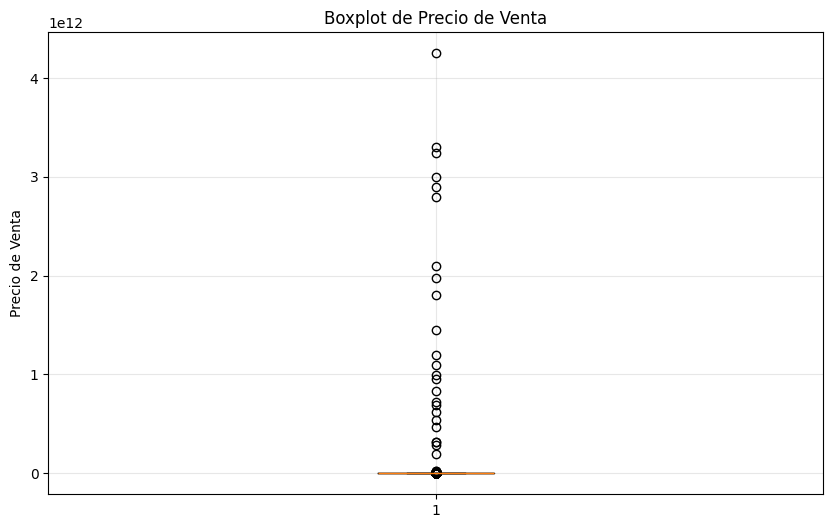

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['precio_venta'].dropna())
plt.ylabel('Precio de Venta')
plt.title('Boxplot de Precio de Venta')
plt.grid(True, alpha=0.3)
plt.show()

Al obsevar las graficas y las estadisticas descriptivas podemos observar que hay muchos valores atipicos en el rango inferior y superior. Por esta razon se eliminar estos valores atipicos utilizando los rangos intercuartiles. Pues tambien los valores minimos y maximos no tienen nada de sentido para el valor de un inmueble en la ciudad.

In [15]:
Q1 = data['precio_venta'].quantile(0.25)
Q3 = data['precio_venta'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [16]:
lower, upper

(np.float64(-1000000000.0), np.float64(2760000000.0))

El valor de lower es negativo y no nos sirve en nuestro proposito por eso se pondra que el limite inferior es 150,000,000

In [17]:
data = data[(data['precio_venta'] >= 150000000) & (data['precio_venta'] <= upper)] 

In [18]:
data.describe()

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,latitud,longitud,jacuzzi,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,distancia_estacion_tm_m,distancia_parque_m
count,2.451500e+04,24515.000000,24515.000000,24515.000000,2.240100e+04,24515.000000,24514.000000,24515.000000,24515.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24515.000000,24515.000000
mean,8.589002e+08,129.707801,2.702713,2.748154,4.775552e+06,1.667265,4.839316,4.690963,-74.062404,0.042753,0.308653,0.654347,0.423694,0.092889,0.598172,1237.434855,822.217383
std,5.970757e+08,232.819544,0.765351,1.093662,6.976921e+07,0.992566,1.172999,0.037313,0.031920,0.202303,0.461947,0.475591,0.494153,0.290283,0.490277,804.427921,438.229970
min,1.500000e+08,0.000000,1.000000,0.000000,1.000000e+00,-2.000000,0.000000,4.508000,-74.210210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.940000,0.220000
25%,4.007690e+08,68.400000,2.000000,2.000000,3.500000e+05,1.000000,4.000000,4.667275,-74.069000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,557.800000,494.305000
50%,6.790000e+08,105.000000,3.000000,3.000000,6.130000e+05,2.000000,5.000000,4.695000,-74.052400,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1129.280000,775.840000
75%,1.200000e+09,165.000000,3.000000,3.000000,1.058000e+06,2.000000,6.000000,4.718047,-74.043080,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1701.720000,1101.510000
max,2.758000e+09,19621.000000,7.000000,6.000000,2.918000e+09,30.000000,6.000000,4.818188,-74.016000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5514.810000,5996.900000


### Area

In [19]:
data['area'].describe()

count    24515.000000
mean       129.707801
std        232.819544
min          0.000000
25%         68.400000
50%        105.000000
75%        165.000000
max      19621.000000
Name: area, dtype: float64

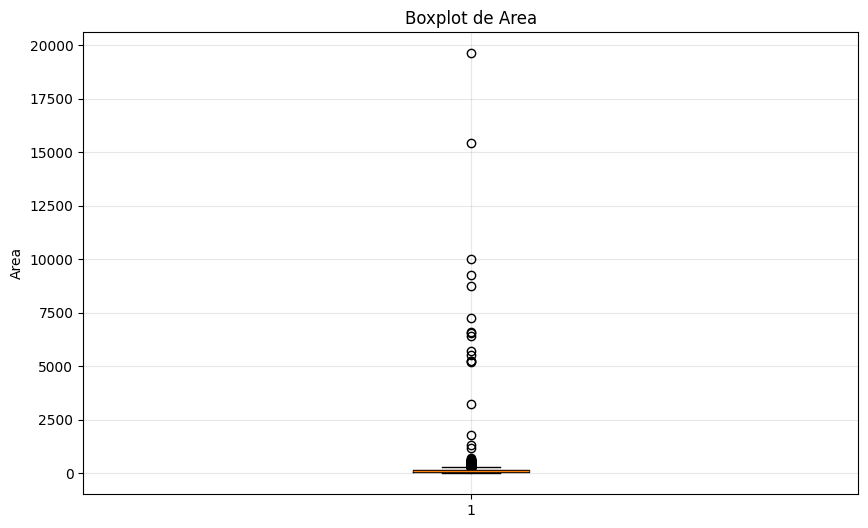

In [20]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['area'])
plt.ylabel('Area')
plt.title('Boxplot de Area')
plt.grid(True, alpha=0.3)
plt.show()

En esta variable tambien hay muchos valores atipicos, por esta razon tambien se realizara la eliminacion de estos valores utilizando el rango intercuartil. Pues tambien los valores minimos y maximos no tienen nada de sentido para el valor del area inmueble en la ciudad.

In [21]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [22]:
lower, upper

(np.float64(-76.49999999999997), np.float64(309.9))

Lower es negativo por esta razon tomaremos las areas mayores o iguales a 50 metros

In [23]:
data = data[(data['area'] >= 50) & (data['area'] <= upper)] 

### Administracion

In [24]:
data['administracion'].describe()


count    1.986400e+04
mean     4.687640e+06
std      6.590098e+07
min      1.000000e+00
25%      3.980000e+05
50%      6.650000e+05
75%      1.080000e+06
max      2.400000e+09
Name: administracion, dtype: float64

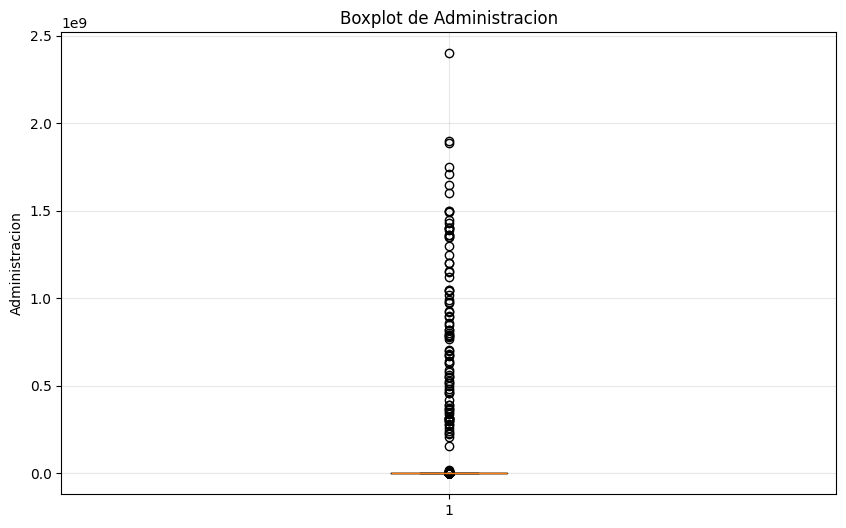

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['administracion'].dropna())
plt.ylabel('Administracion')
plt.title('Boxplot de Administracion')
plt.grid(True, alpha=0.3)
plt.show()

En esta variable tambien hay muchos valores atipicos, por esta razon tambien se realizara la eliminacion de estos valores utilizando el rango intercuartil. Pues tambien los valores minimos y maximos no tienen nada de sentido para el valor de una administracion en la ciudad.

In [26]:
Q1 = data['administracion'].quantile(0.25)
Q3 = data['administracion'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [27]:
data = data[(data['administracion'] >= lower) & (data['administracion'] <= upper)] 

### Completitud

In [28]:
data.describe()

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,latitud,longitud,jacuzzi,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,distancia_estacion_tm_m,distancia_parque_m
count,1.938800e+04,19388.000000,19388.000000,19388.000000,1.938800e+04,19388.000000,19387.00000,19388.000000,19388.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19388.000000,19388.000000
mean,8.658804e+08,125.850645,2.772746,2.854756,7.494424e+05,1.760264,4.95987,4.693796,-74.059638,0.043382,0.320489,0.674868,0.434540,0.097803,0.618539,1228.343891,822.802850
std,5.353246e+08,60.048337,0.670612,0.988378,4.573165e+05,0.890500,1.08217,0.034218,0.028749,0.203720,0.466677,0.468436,0.495709,0.297055,0.485758,775.120751,437.989979
min,1.500000e+08,50.000000,1.000000,0.000000,1.000000e+00,-2.000000,0.00000,4.529120,-74.209490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.940000,0.220000
25%,4.580000e+08,77.000000,2.000000,2.000000,3.900000e+05,1.000000,4.00000,4.672000,-74.065613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,570.425000,492.210000
50%,7.190000e+08,111.000000,3.000000,3.000000,6.500000e+05,2.000000,5.00000,4.697000,-74.051760,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1124.145000,779.860000
75%,1.190000e+09,164.000000,3.000000,3.000000,1.030000e+06,2.000000,6.00000,4.718865,-74.042620,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1691.710000,1105.752500
max,2.750000e+09,309.400000,7.000000,6.000000,2.102000e+06,30.000000,6.00000,4.817531,-74.016000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5419.420000,5865.300000


Vemos que las variables jacuzzi, gimnasio, ascensor, conjunto_cerrado, piscina, vigilancia tienen dos valores faltantes.

In [29]:
data[data['jacuzzi'].isnull()]

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,antiguedad,latitud,longitud,jacuzzi,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,distancia_estacion_tm_m,distancia_parque_m
30855,1.100000e+09,98.0,4.0,3.0,1400000.0,2.0,6.0,MAS DE 20 ANOS,4.686329,-74.044945,NaN,NaN,NaN,NaN,NaN,NaN,1437.72,1754.63
38781,1.680000e+09,174.0,2.0,3.0,970000.0,4.0,6.0,ENTRE 5 Y 10 ANOS,4.742304,-74.075480,NaN,NaN,NaN,NaN,NaN,NaN,968.58,347.85


Al investigar estas pertenecen a los mismos registros. Se procedera a eliminarlos

In [30]:
data = data[~data['jacuzzi'].isnull()]

In [31]:
data.describe()

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,latitud,longitud,jacuzzi,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,distancia_estacion_tm_m,distancia_parque_m
count,1.938600e+04,19386.000000,19386.000000,19386.000000,1.938600e+04,19386.000000,19385.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000
mean,8.658263e+08,125.849598,2.772723,2.854741,7.493975e+05,1.760136,4.959763,4.693794,-74.059638,0.043382,0.320489,0.674868,0.434540,0.097803,0.618539,1228.346490,822.779282
std,5.353176e+08,60.050106,0.670565,0.988428,4.573135e+05,0.890399,1.082174,0.034218,0.028750,0.203720,0.466677,0.468436,0.495709,0.297055,0.485758,775.157032,437.948152
min,1.500000e+08,50.000000,1.000000,0.000000,1.000000e+00,-2.000000,0.000000,4.529120,-74.209490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.940000,0.220000
25%,4.580000e+08,77.000000,2.000000,2.000000,3.900000e+05,1.000000,4.000000,4.672000,-74.065609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,570.355000,492.210000
50%,7.190000e+08,111.000000,3.000000,3.000000,6.500000e+05,2.000000,5.000000,4.697000,-74.051760,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1124.145000,779.860000
75%,1.190000e+09,164.000000,3.000000,3.000000,1.030000e+06,2.000000,6.000000,4.718864,-74.042620,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1691.710000,1105.717500
max,2.750000e+09,309.400000,7.000000,6.000000,2.102000e+06,30.000000,6.000000,4.817531,-74.016000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5419.420000,5865.300000


### Parqueaderos 

Los parqueaderos segun el perfilamiento tienen dos valores a tipico especificamente en los extremos de, pues el valor minimo es -2 y el valoe maximo es 30. Estos valores no tienen sentido, por esta razon se realizara una inputacion de datos donde el registro que tiene el valor de -2 se le pondra el valor de 0 y el valor que tiene 30 se pondra el valor de tres dado que se entiende que fue un error de inputacion.

In [32]:
data.loc[data['parqueaderos'] == -2, 'parqueaderos'] = 0

In [33]:
data.loc[data['parqueaderos'] == 30, 'parqueaderos'] = 3

### Estrato

Estrato es una de las variables que todavia tiene un valor faltante.

In [34]:
data[data['estrato'].isnull()]

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,antiguedad,latitud,longitud,jacuzzi,gimnasio,ascensor,conjunto_cerrado,piscina,vigilancia,distancia_estacion_tm_m,distancia_parque_m
391,470000000.0,69.0,2.0,2.0,547000.0,1.0,NaN,MAS DE 20 ANOS,4.6482,-74.053811,0.0,0.0,0.0,1.0,0.0,0.0,1225.01,322.32


Segun las busquedas se logro identificar que ese predio es estrato 5

In [35]:
data.loc[data['estrato'].isnull(), 'estrato'] = 5

### Antiguedad

In [36]:
print("Estadísticas de la variable 'antiguedad':")
print("\nConteo de valores:")
print(data['antiguedad'].value_counts())
print("\nValores faltantes:", data['antiguedad'].isnull().sum())
print("Porcentaje de valores faltantes:", (data['antiguedad'].isnull().sum() / len(data)) * 100, "%")
print("\nTotal de registros:", len(data))
print("Registros no nulos:", data['antiguedad'].notna().sum())

Estadísticas de la variable 'antiguedad':

Conteo de valores:
antiguedad
MAS DE 20 ANOS        7504
ENTRE 10 Y 20 ANOS    5534
ENTRE 5 Y 10 ANOS     3191
ENTRE 0 Y 5 ANOS      2472
REMODELADO             678
Name: count, dtype: int64

Valores faltantes: 7
Porcentaje de valores faltantes: 0.03610853193025895 %

Total de registros: 19386
Registros no nulos: 19379


Dado que no se conce el valor se eliminaran estos registros

In [37]:
data = data[~data['antiguedad'].isnull()]

Ahora bien dado que esta es una variable categorica se debe realizar el encoding

In [38]:
data = pd.get_dummies(data, columns=['antiguedad'], prefix='antiguedad', drop_first=True)


print("Nuevas columnas después del encoding con dummies:")
print([col for col in data.columns if 'antiguedad' in col])


Nuevas columnas después del encoding con dummies:
['antiguedad_ENTRE 10 Y 20 ANOS', 'antiguedad_ENTRE 5 Y 10 ANOS', 'antiguedad_MAS DE 20 ANOS', 'antiguedad_REMODELADO']


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19379 entries, 0 to 43012
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   precio_venta                   19379 non-null  float64
 1   area                           19379 non-null  float64
 2   habitaciones                   19379 non-null  float64
 3   banos                          19379 non-null  float64
 4   administracion                 19379 non-null  float64
 5   parqueaderos                   19379 non-null  float64
 6   estrato                        19379 non-null  float64
 7   latitud                        19379 non-null  float64
 8   longitud                       19379 non-null  float64
 9   jacuzzi                        19379 non-null  float64
 10  gimnasio                       19379 non-null  float64
 11  ascensor                       19379 non-null  float64
 12  conjunto_cerrado               19379 non-null  floa

## 2. Entrenamiento del modelo de Machine Learning

In [40]:
X = data.drop(columns=['precio_venta'])
y = data['precio_venta']

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.2,     
    random_state=42,     
    shuffle=True         
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,     
    random_state=42,
    shuffle=True
)

### Regresión Lineal con penalización Lasso

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso



pipe_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(max_iter=10000))
])

param_grid = {
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(
    pipe_lasso,
    param_grid,
    cv=5,
    scoring="neg_mean_absolute_error"
)

grid.fit(X_train, y_train)

print("Mejor alpha:", grid.best_params_["model__alpha"])
print("Mejor MAE CV:", -grid.best_score_)


Mejor alpha: 1
Mejor MAE CV: 146693709.54598847


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

best_lasso = grid.best_estimator_

y_pred_test_lasso = best_lasso.predict(X_test)

rmse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
r2_lasso = r2_score(y_test, y_pred_test_lasso)

print("LASSO - Test RMSE:", np.sqrt(rmse_lasso))
print("LASSO - Test MAE:", mae_lasso)
print("LASSO - Test R²:", r2_lasso)

LASSO - Test RMSE: 209859728.9062062
LASSO - Test MAE: 147976829.20754623
LASSO - Test R²: 0.8467555765962509


### Regresion lineal con forward feature selection

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

sfs = SFS(
    pipe_lr,
    k_features="best",   
    forward=True,
    floating=False,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

sfs = sfs.fit(X_train, y_train)

print("Índices de variables seleccionadas:", sfs.k_feature_idx_)
print("Mejor MAE (CV):", -sfs.k_score_)


selected_idx = list(sfs.k_feature_idx_)
selected_features = X_train.columns[selected_idx]


X_train_sfs = X_train[selected_features]


final_pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

final_pipe_lr.fit(X_train_sfs, y_train)


Índices de variables seleccionadas: (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19)
Mejor MAE (CV): 146658704.4517303


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [45]:
X_test_sfs = X_test[selected_features]

y_pred_test_sfs = final_pipe_lr.predict(X_test_sfs)

rmse_sfs = mean_squared_error(y_test, y_pred_test_sfs)
mae_sfs = mean_absolute_error(y_test, y_pred_test_sfs)
r2_sfs = r2_score(y_test, y_pred_test_sfs)

print("Forward Selection – RMSE test:", np.sqrt(rmse_sfs))
print("Forward Selection – MAE test:", mae_sfs)
print("Forward Selection – R² test:", r2_sfs)

Forward Selection – RMSE test: 209939340.69661373
Forward Selection – MAE test: 147953376.18106002
Forward Selection – R² test: 0.8466392858045746


### Random forest regressor

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

pipe_rf = Pipeline([
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_dist_rf = {
    "model__n_estimators": randint(200, 1000),
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": randint(2, 20),
    "model__min_samples_leaf": randint(1, 10),
    "model__max_features": ["sqrt", "log2", 0.3, 0.5, 0.8],
    "model__bootstrap": [True, False],
}

rand_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=40,                    # número de combinaciones a probar
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42
)

rand_rf.fit(X_train, y_train)

print("Mejores parámetros RF:", rand_rf.best_params_)
print("Mejor MAE CV (RF):", -rand_rf.best_score_)


/home/juanperez/.local/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros RF: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 0.3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 761}
Mejor MAE CV (RF): 102645060.45407215


In [47]:
best_rf = rand_rf.best_estimator_

y_pred_test_rf = best_rf.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_test_rf,)
mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_rf = r2_score(y_test, y_pred_test_rf)

print("RF - Test RMSE:", np.sqrt(rmse_rf))
print("RF - Test MAE:", mae_rf)
print("RF - Test R²:", r2_rf)


RF - Test RMSE: 160144061.5497859
RF - Test MAE: 99534831.22602901
RF - Test R²: 0.910762346494684


### Gradient boosting regressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

pipe_gbr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor())
])

param_grid_gbr = {
    "model__n_estimators": [200, 400],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [2, 3, 4]
}

grid_gbr = GridSearchCV(
    pipe_gbr,
    param_grid_gbr,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

grid_gbr.fit(X_train, y_train)

print("Mejores hiperparámetros GBR:", grid_gbr.best_params_)
print("Mejor MAE (CV):", -grid_gbr.best_score_)

Mejores hiperparámetros GBR: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 400}
Mejor MAE (CV): 109286076.95759645


In [49]:
best_gbr = grid_gbr.best_estimator_

# Predicciones en test
y_pred_test_gbr = best_gbr.predict(X_test)

# Métricas EN TEST
rmse_gbr = mean_squared_error(y_test, y_pred_test_gbr)
mae_gbr  = mean_absolute_error(y_test, y_pred_test_gbr)
r2_gbr   = r2_score(y_test, y_pred_test_gbr)

print("GradientBoosting - Test RMSE:", np.sqrt(rmse_gbr))
print("GradientBoosting - Test MAE:", mae_gbr)
print("GradientBoosting - Test R²:", r2_gbr)


GradientBoosting - Test RMSE: 169862926.54071748
GradientBoosting - Test MAE: 109600738.32129163
GradientBoosting - Test R²: 0.8996023219441001


### Mejor modelo

Al revisar detenidamente el las metricas del MAE, R² y RMSE en el conjunto de test, podemos observar que el mejor modelo es el Random Forest Regresor. Hay que mencionar que en entrenamienti se escogio la metrica de MAE dado a que dado el contexto queriamos disminuir el error para que el precio del apartamento no quede por debajo de los 20 millones. Este modelo tuvo el menor MAE, tambien , tuvo el menor RMSE y el mayor R².

## 3. Análisis cuantitativo de resultados del modelo: Calcule las métricas de evaluación para sus modelos, y explique su significado y su valor para la empresa.Justifique la calidad de su modelo, qué elementos impactaron positivamente dichas métricas, y qué oportunidades de mejora encuentra.

In [50]:
y_pred_val_rf = best_rf.predict(X_val)

rmse_rf = mean_squared_error(y_val, y_pred_val_rf,)
mae_rf = mean_absolute_error(y_val, y_pred_val_rf)
r2_rf = r2_score(y_val, y_pred_val_rf)
print("RF - Test RMSE:", np.sqrt(rmse_rf))
print("RF - Test MAE:", mae_rf)
print("RF - Test R²:", r2_rf)

RF - Test RMSE: 160203764.51102966
RF - Test MAE: 100290598.11384946
RF - Test R²: 0.9148190611855289


In [51]:
errores = y_val - y_pred_val_rf

In [52]:
avaluo_presencial = (errores > 20000000).sum()

print("Número de avalúos presenciales necesarios:", avaluo_presencial)
print("porcentaje de avalúos presenciales necesarios:", (avaluo_presencial / len(y_val)) * 100, "%")

Número de avalúos presenciales necesarios: 659
porcentaje de avalúos presenciales necesarios: 34.00412796697626 %


In [53]:
mae_rf/y.describe().mean()*100

np.float64(12.039732490888056)

In [54]:
y.describe()

count    1.937900e+04
mean     8.657288e+08
std      5.353320e+08
min      1.500000e+08
25%      4.578950e+08
50%      7.150000e+08
75%      1.190000e+09
max      2.750000e+09
Name: precio_venta, dtype: float64

En el conjunto de validación, completamente independiente del entrenamiento y de la selección de modelo, se obtuvieron las siguientes métricas:

MAE: 100,290,598 pesos

RMSE: 160,203,764

R²: 0.914

Interpretaciones:
- MAE:
Significa que, en promedio, el modelo se equivoca en 100,290,598 millones de pesos al estimar el precio de un apartamento. Dado que el precio promedio del dataset es de 775,800,559 millones de pesos, este error corresponde aproximadamente al 12.04% sobre el valor del inmueble.

- RMSE:
Esto indica que existen apartamentos donde la predicción se desvía significativamente. Sin embargo, hay que tener en cuenta que los precios de los apartamentos son valores grandes que estan en un rango entre 150,000,000 y 2,750,000,000.

- R² 
El modelo explica el 91,4% de la variabilidad de los precios de los apartamentos. Esto implica que las características incluidas capturan muy bien los factores que afectan el precio real.

Ahora bien, en terminos del número de peritos presenciales, en los datos de validacion se requieren de 659 inmuebles que equivalen al 34% de los que se tenian en este conjunto de datos. Esto significa que aproximadamente 3 de cada 10 apartamentos requerirían todavía revisión presencial del perito debido a subestimaciones significativas del modelo. El modelo funciona bien en la mayoría de los casos, pero aún hay un porcentaje considerable donde el error es crítico para la operación.

Los siguientes elementos contribuyeron positivamente al buen desempeño del modelo:

- Uso de un modelo no lineal capaz de capturar interacciones complejas entre variables ademas estos modelos se desempeñaron mucho mejor que los lineales.

- Transformaciones, mejorando la estabilidad del modelo.

- Codificación adecuada de variables categóricas (antigüedad).

- Eliminación de valores nulos y la robutsa limpieza de outliers y datos que no tenian correspondecia en el contexto, por eso obtuvimos un R² alto.

Aunque el modelo es funcional y aporta valor económico, se identifican oportunidades para mejorarlo:

1. Reducir subestimaciones > 20 millones, pues esto impacta los costos operativos.
2. Incrementar el número de caractreristcas de los apartamentos.
3. Incrementar el tamaño del dataset
4. Una de las opciones que se penso fue realizar una tranformacion de la variable objetivo para disminuir la maginutd de estos datos. 
5. Haciendo selección de caracteristicas

## 4. Análisis cualitativo de resultados del modelo: Utilizando valores SHAPLEY y Lime, realice un análisis cualitativo de sus modelos. Examine tanto el comportamiento global como el comportamiento de una muestra de predicciones individuales. Construya una interpretación de cómo está funcionando su modelo.

### Comportamiento Global (SHAP)

In [55]:
import shap

In [56]:
X_train_sample = X_train.sample(500, random_state=42)

In [57]:
rf_model = best_rf.named_steps["model"]

explainer_shap = shap.TreeExplainer(rf_model)

shap_values = explainer_shap.shap_values(X_train_sample)

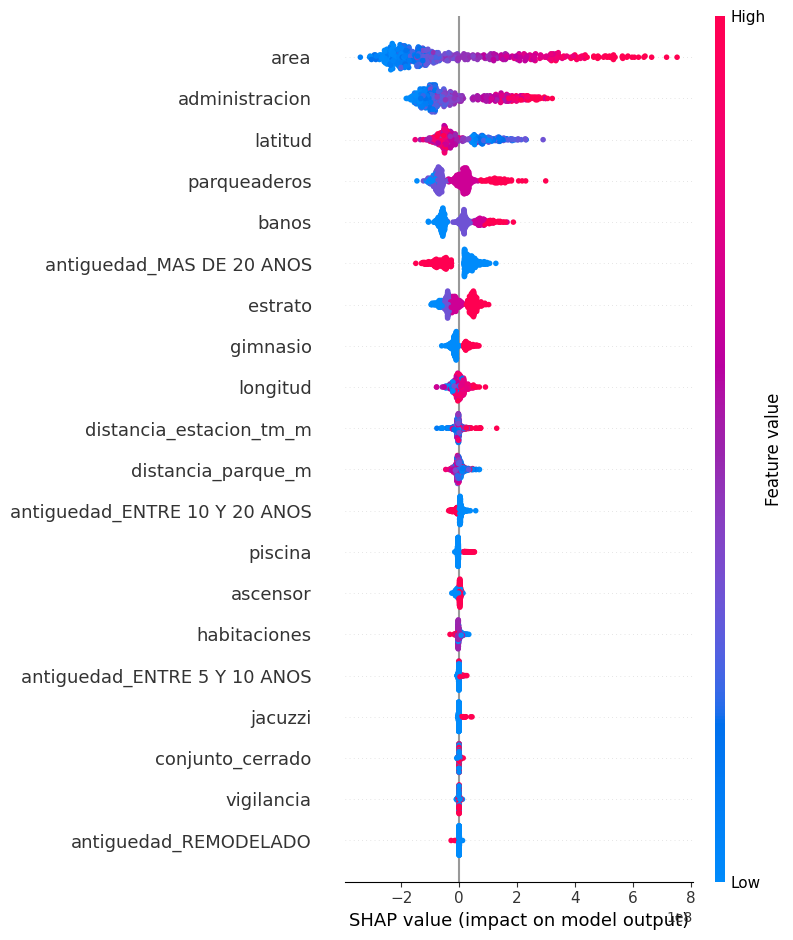

In [58]:
shap.summary_plot(
    shap_values, 
    X_train_sample, 
    feature_names=X_train.columns
)

A nivel global, el modelo identifica el área privada del apartamento como el principal determinante del precio de venta: valores altos de área tienden a incrementar la predicción del modelo, mientras que áreas pequeñas la reducen. Variables asociadas a costos de administración, número de parqueaderos y localización (latitud/longitud) también muestran impactos importantes, ciertos rangos de ubicación y una mayor oferta de parqueaderos se asocian con aumentos en el valor estimado.

La antigüedad del inmueble y su estado (por ejemplo, “remodelado” o “más de 20 años”) tienden a ejercer un efecto negativo o positivo según el caso, reflejando que apartamentos antiguos sin remodelar reducen el precio esperado, mientras que inmuebles remodelados o con menor antigüedad contribuyen a aumentarlo.

Finalmente, las distancias a transporte masivo y parques muestran que apartamentos ubicados más cerca de estos servicios son valorados más alto por el modelo, lo cual es coherente con el comportamiento del mercado inmobiliario.

### Comportamiento Local

In [63]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

feature_names = X_train.columns.tolist()

explainer_lime = LimeTabularExplainer(
    training_data=X_train.to_numpy(),
    feature_names=feature_names,
    mode="regression",       
    verbose=True,
    random_state=42
)



===== Ejemplo 0 =====
Precio real:        875000000.0
Predicción modelo:  772083404.8641042
Error (real - pred): 102916595.13589585


/home/juanperez/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1046097657.8160108
Prediction_local [6.667601e+08]
Right: 772083404.8641042


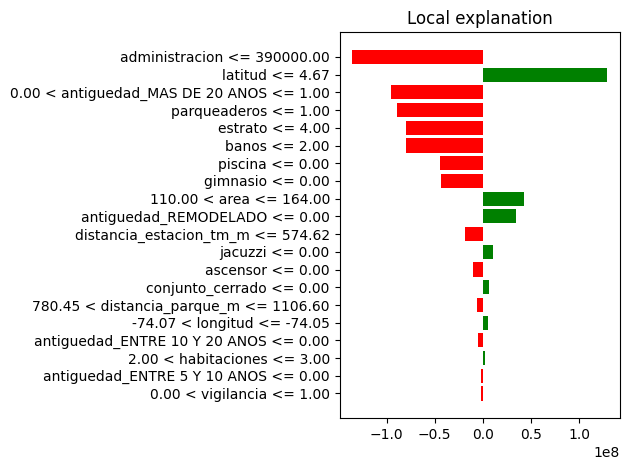

administracion <= 390000.00 => -135527688.01143938
latitud <= 4.67 => 129229669.58540839
0.00 < antiguedad_MAS DE 20 ANOS <= 1.00 => -95032769.76495717
parqueaderos <= 1.00 => -89042582.932822
estrato <= 4.00 => -80092441.03168932
banos <= 2.00 => -79409456.22862755
piscina <= 0.00 => -44262520.351291515
gimnasio <= 0.00 => -43774423.12809392
110.00 < area <= 164.00 => 43079268.80854011
antiguedad_REMODELADO <= 0.00 => 34082935.55268518
distancia_estacion_tm_m <= 574.62 => -18723908.28704049
jacuzzi <= 0.00 => 10568634.943419663
ascensor <= 0.00 => -9891578.656218478
conjunto_cerrado <= 0.00 => 6377957.0681227315
780.45 < distancia_parque_m <= 1106.60 => -5587362.257373503
-74.07 < longitud <= -74.05 => 5530071.625287768
antiguedad_ENTRE 10 Y 20 ANOS <= 0.00 => -5449283.581196358
2.00 < habitaciones <= 3.00 => 2243733.0626808144
antiguedad_ENTRE 5 Y 10 ANOS <= 0.00 => -2048604.527699865
0.00 < vigilancia <= 1.00 => -1607209.6069966021

===== Ejemplo 105 =====
Precio real:        145000

/home/juanperez/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 594287872.7225609
Prediction_local [1.81458457e+09]
Right: 1911071083.5523434


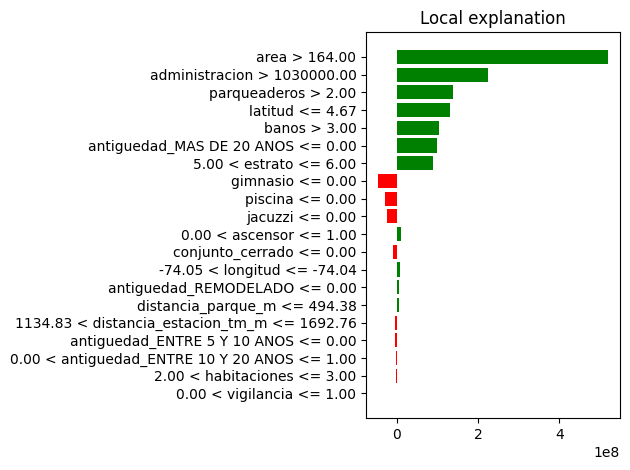

area > 164.00 => 520828562.03469545
administracion > 1030000.00 => 225476212.1295052
parqueaderos > 2.00 => 137681244.4092011
latitud <= 4.67 => 131634886.64823076
banos > 3.00 => 104152674.62626892
antiguedad_MAS DE 20 ANOS <= 0.00 => 99593522.63379318
5.00 < estrato <= 6.00 => 88605997.60998476
gimnasio <= 0.00 => -46373335.432181925
piscina <= 0.00 => -28212324.554917622
jacuzzi <= 0.00 => -23511277.301730674
0.00 < ascensor <= 1.00 => 11782689.555895612
conjunto_cerrado <= 0.00 => -9435463.510534288
-74.05 < longitud <= -74.04 => 8815864.89039452
antiguedad_REMODELADO <= 0.00 => 6000669.022733778
distancia_parque_m <= 494.38 => 4830033.662723164
1134.83 < distancia_estacion_tm_m <= 1692.76 => -4803379.238391131
antiguedad_ENTRE 5 Y 10 ANOS <= 0.00 => -4399495.392416965
0.00 < antiguedad_ENTRE 10 Y 20 ANOS <= 1.00 => -1964031.635125952
2.00 < habitaciones <= 3.00 => -573715.188322706
0.00 < vigilancia <= 1.00 => 167361.2981113266


In [69]:
num_feats = X_train.shape[1]
indices = [0, 105]

for i in indices:
    print(f"\n===== Ejemplo {i} =====")
    x_test_i = X_val.iloc[i].to_numpy()
    y_true_i = y_val.iloc[i]

    y_pred_i = best_rf.predict(X_val.iloc[[i]])[0]

    print("Precio real:       ", y_true_i)
    print("Predicción modelo: ", y_pred_i)
    print("Error (real - pred):", y_true_i - y_pred_i)

    exp = explainer_lime.explain_instance(
        data_row=x_test_i,
        predict_fn=best_rf.predict,
        num_features=num_feats           
    )

    fig = exp.as_pyplot_figure()
    plt.tight_layout()
    plt.show()

    # Si quieres listar los aportes en texto
    for feature, contribution in exp.as_list():
        print(feature, "=>", contribution)

En el Ejemplo 1, el modelo identifica varios factores que reducen y aumentan el precio estimado del apartamento. A partir de los valores de contribución LIME, podemos interpretar lo siguiente:

### Factores que disminuyen el precio estimado

- Administración baja (≤ 390,000 COP)
  Una cuota de administración reducida suele asociarse con edificios de menor nivel o menos amenidades. Esto genera una fuerte caída en el precio estimado:
  **–135,527,688 COP**.

- Antigüedad mayor a 20 años
  Los inmuebles muy antiguos suelen tener menor valorización. Aquí la antigüedad >20 años aporta una reducción de
  **–95,032,769 COP**.

- Máximo un parqueadero (≤ 1)
  La oferta limitada de parqueaderos es penalizada por el modelo con
  **–89,042,582 COP**.

- Estrato ≤ 4 (estrato medio)
  El modelo asigna valores más altos a estratos 5–6. En este caso, pertenecer a un estrato medio representa
  **–80,092,441 COP**.

### Factores que aumentan el precio estimado

- Ubicación según latitud
  La latitud del inmueble lo ubica en una zona donde el modelo reconoce precios mayores. En este ejemplo aporta
  **+129,229,669 COP**.

- Área entre 110 y 164 m²
  A pesar de no ser un apartamento extremadamente grande, el metraje está por encima del promedio y contribuye positivamente.

  **+43,079,268 COP**


Ejemplo 2:

### **Factores que AUMENTAN el precio estimado**

- Área > 164 m²
  El tamaño es el factor más determinante. Un área amplia incrementa enormemente el valor:
  **+520,828,562 COP**.

- Administración > 1,030,000 COP
  Cuotas altas suelen reflejar torres premium con mejores servicios y seguridad.
  **+225,476,212 COP**.

- Más de 2 parqueaderos
  La disponibilidad de varios parqueaderos es muy valorada en Bogotá.
  **+137,681,244 COP**.

- Latitud de zona valorizada (<= 4.67)
  La ubicación en un sector de alto valor aporta
  **+131,634,887 COP**.

- Más de 3 baños
  Apartamentos grandes con varios baños son propios del segmento alto.
  **+104,152,675 COP**.

- No es antiguo (>20 años no aplica)
  Estar por fuera de la categoría de “muy antiguo” favorece el precio.
  **+99,593,523 COP**.

- Estrato 5–6
  Los barrios de estrato alto se reflejan en:
  **+88,605,998 COP**.

- Ascensor presente
  Amenidad estándar en viviendas de gama media-alta.
  **+11,782,690 COP**.

- Longitud en rango privilegiado
  La variación espacial se traduce en
  **+8,815,865 COP**.

- Remodelado (efecto leve)
  LIME da un pequeño ajuste positivo a la variable remodelación:
  **+6,000,669 COP**.

- Proximidad a parque (≤ 494 m)
  Cercanía a zonas verdes:
  **+4,830,034 COP**.

- Vigilancia
  Impacto pequeño pero positivo:
  **+167,361 COP**.


### Factores que REDUCEN el precio estimado

- Gimnasio ausente
  Amenidad muy valorada en el segmento alto.
  **–46,373,335 COP**.

- Piscina ausente
  Afecta el posicionamiento premium:
  **–28,212,325 COP**.

- Jacuzzi ausente
  Reducción de
  **–23,511,277 COP**.

- Conjunto cerrado ausente
  Aporta
  **–9,435,464 COP**.

- Distancia a estación de TM en rango medio
  **–4,803,379 COP**
  (No muy cerca ni muy lejos).

- Categorías de antigüedad intermedia no cumplidas
  * No estar en el rango 5–10 años: **–4,399,495 COP**
  * Estar en el rango 10–20 años: **–1,964,032 COP**

- Habitaciones entre 2 y 3
  Menor capacidad frente a apartamentos muy amplios:
  **–573,715 COP**.

## 5. Generación de valor

### Ahorro esperado

In [71]:
alfa = (6-1) * 9500
alfa

47500

### Costo de corregir un error

In [72]:
epsilon = 6 * 9500
epsilon

57000

### Exactitud promedio

In [77]:
I = (errores < 20000000).sum() / len(y_val)
I

np.float64(0.6599587203302374)

### Ahorros Ajustados

In [80]:
a_hat = alfa - (1-I) * epsilon
a_hat

np.float64(28117.64705882353)

La ganancia ganancia esperada para HabitAlpes con la implementación del modelo por cada estimación se de 9,882 COP

### Precision de equilibrio

In [82]:
p_e = 1 - alfa / epsilon

p_e

0.16666666666666663

Con estos costos la precision del modelo deberia ser de 0.16. En nuestro caso tenemos 0.65 que es muy superior al necesitado

### ROI

Se tiene un costo del proyecto (incluyendo despliegue y modelo) y del trabajo por parte de los Ingenieros de Sistemas en estas dos semanas de 20,000,000 COP. Ademas toca ver como 

In [85]:
roi = 20000000/(a_hat*500)
roi

np.float64(1.422594142259414)

Ahora bien, para que HabitAlpes empiece a tener dividendos por la inversion de este proyecto, deben pasar 1.42 meses